# Advanced Regression Assignment

#### Understanding the problem statement

A US-based housing company named Surprise Housing decided to expand their business in Australia. The company collects data about houses, buy them in lower price and then increase the price before selling those in order to earn profit. The company is looking at prospective properties to buy to enter the market. Thee company has also collected a data set from the sale of houses in Australia.

They are interested in understanding the following:
 - Which variables are significant in predicting the price of a house
 - How well those variables describe the price of a house
 
Also, we need to determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal

We need to create a model from the available independent variables from the dataset. The model that will be created will help management understand the price of housing depends on what all variables. Also, the management will be able to understand the pricing dynamics of a new market.

#### Data Provided

1. House price Data Set - Contains house sales data
2. Data Dictionary - Details of the variales of the data sheet.

# 1. Data Understanding and Exploration

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Importing datetime
from datetime import datetime

# Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Modelling Libraries
from sklearn import metrics

# Importing Linear Regression,Ridge & Lasso 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Importing RFE
from sklearn.feature_selection import RFE
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler
#Import train_test_split
from sklearn.model_selection import train_test_split


# Hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Fetching data

house_price = pd.read_csv("train.csv",  sep = ',', header= 0 )
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Viewing the shape of dataframe
house_price.shape

(1460, 81)

In [4]:
# Viewing the datatypes of various columns and no of total ot null rows in each column
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

It is clearly evident that there are some missing values

In [5]:
# Viewing the statistical summary of the dataframe
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Exploratory Data Analysis

### Converting datatypes to appropriate forms for columns

In [6]:
house_price.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
# Changing MSSubClass, MSZoning, OverallQual, OverallCond, MasVnrType columns to Object type
house_price["MSSubClass"]= house_price["MSSubClass"].astype("object")
house_price["MSZoning"]= house_price["MSZoning"].astype("object")
house_price["MasVnrType"]= house_price["OverallCond"].astype("object")



In [8]:
house_price.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### Target Variable Visualization

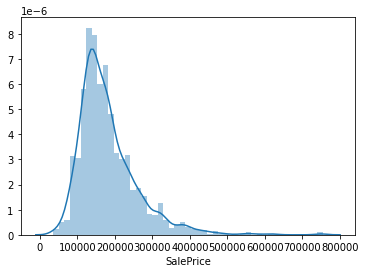

In [9]:
# Checking distriution of price of house
sns.distplot(house_price['SalePrice'])
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
'SalePrice' seems to be highly right skewed so this needs to be transformed to normal distribution which will be done on Data Preparation  
    
</div>    

### Exploring Numerical Variables

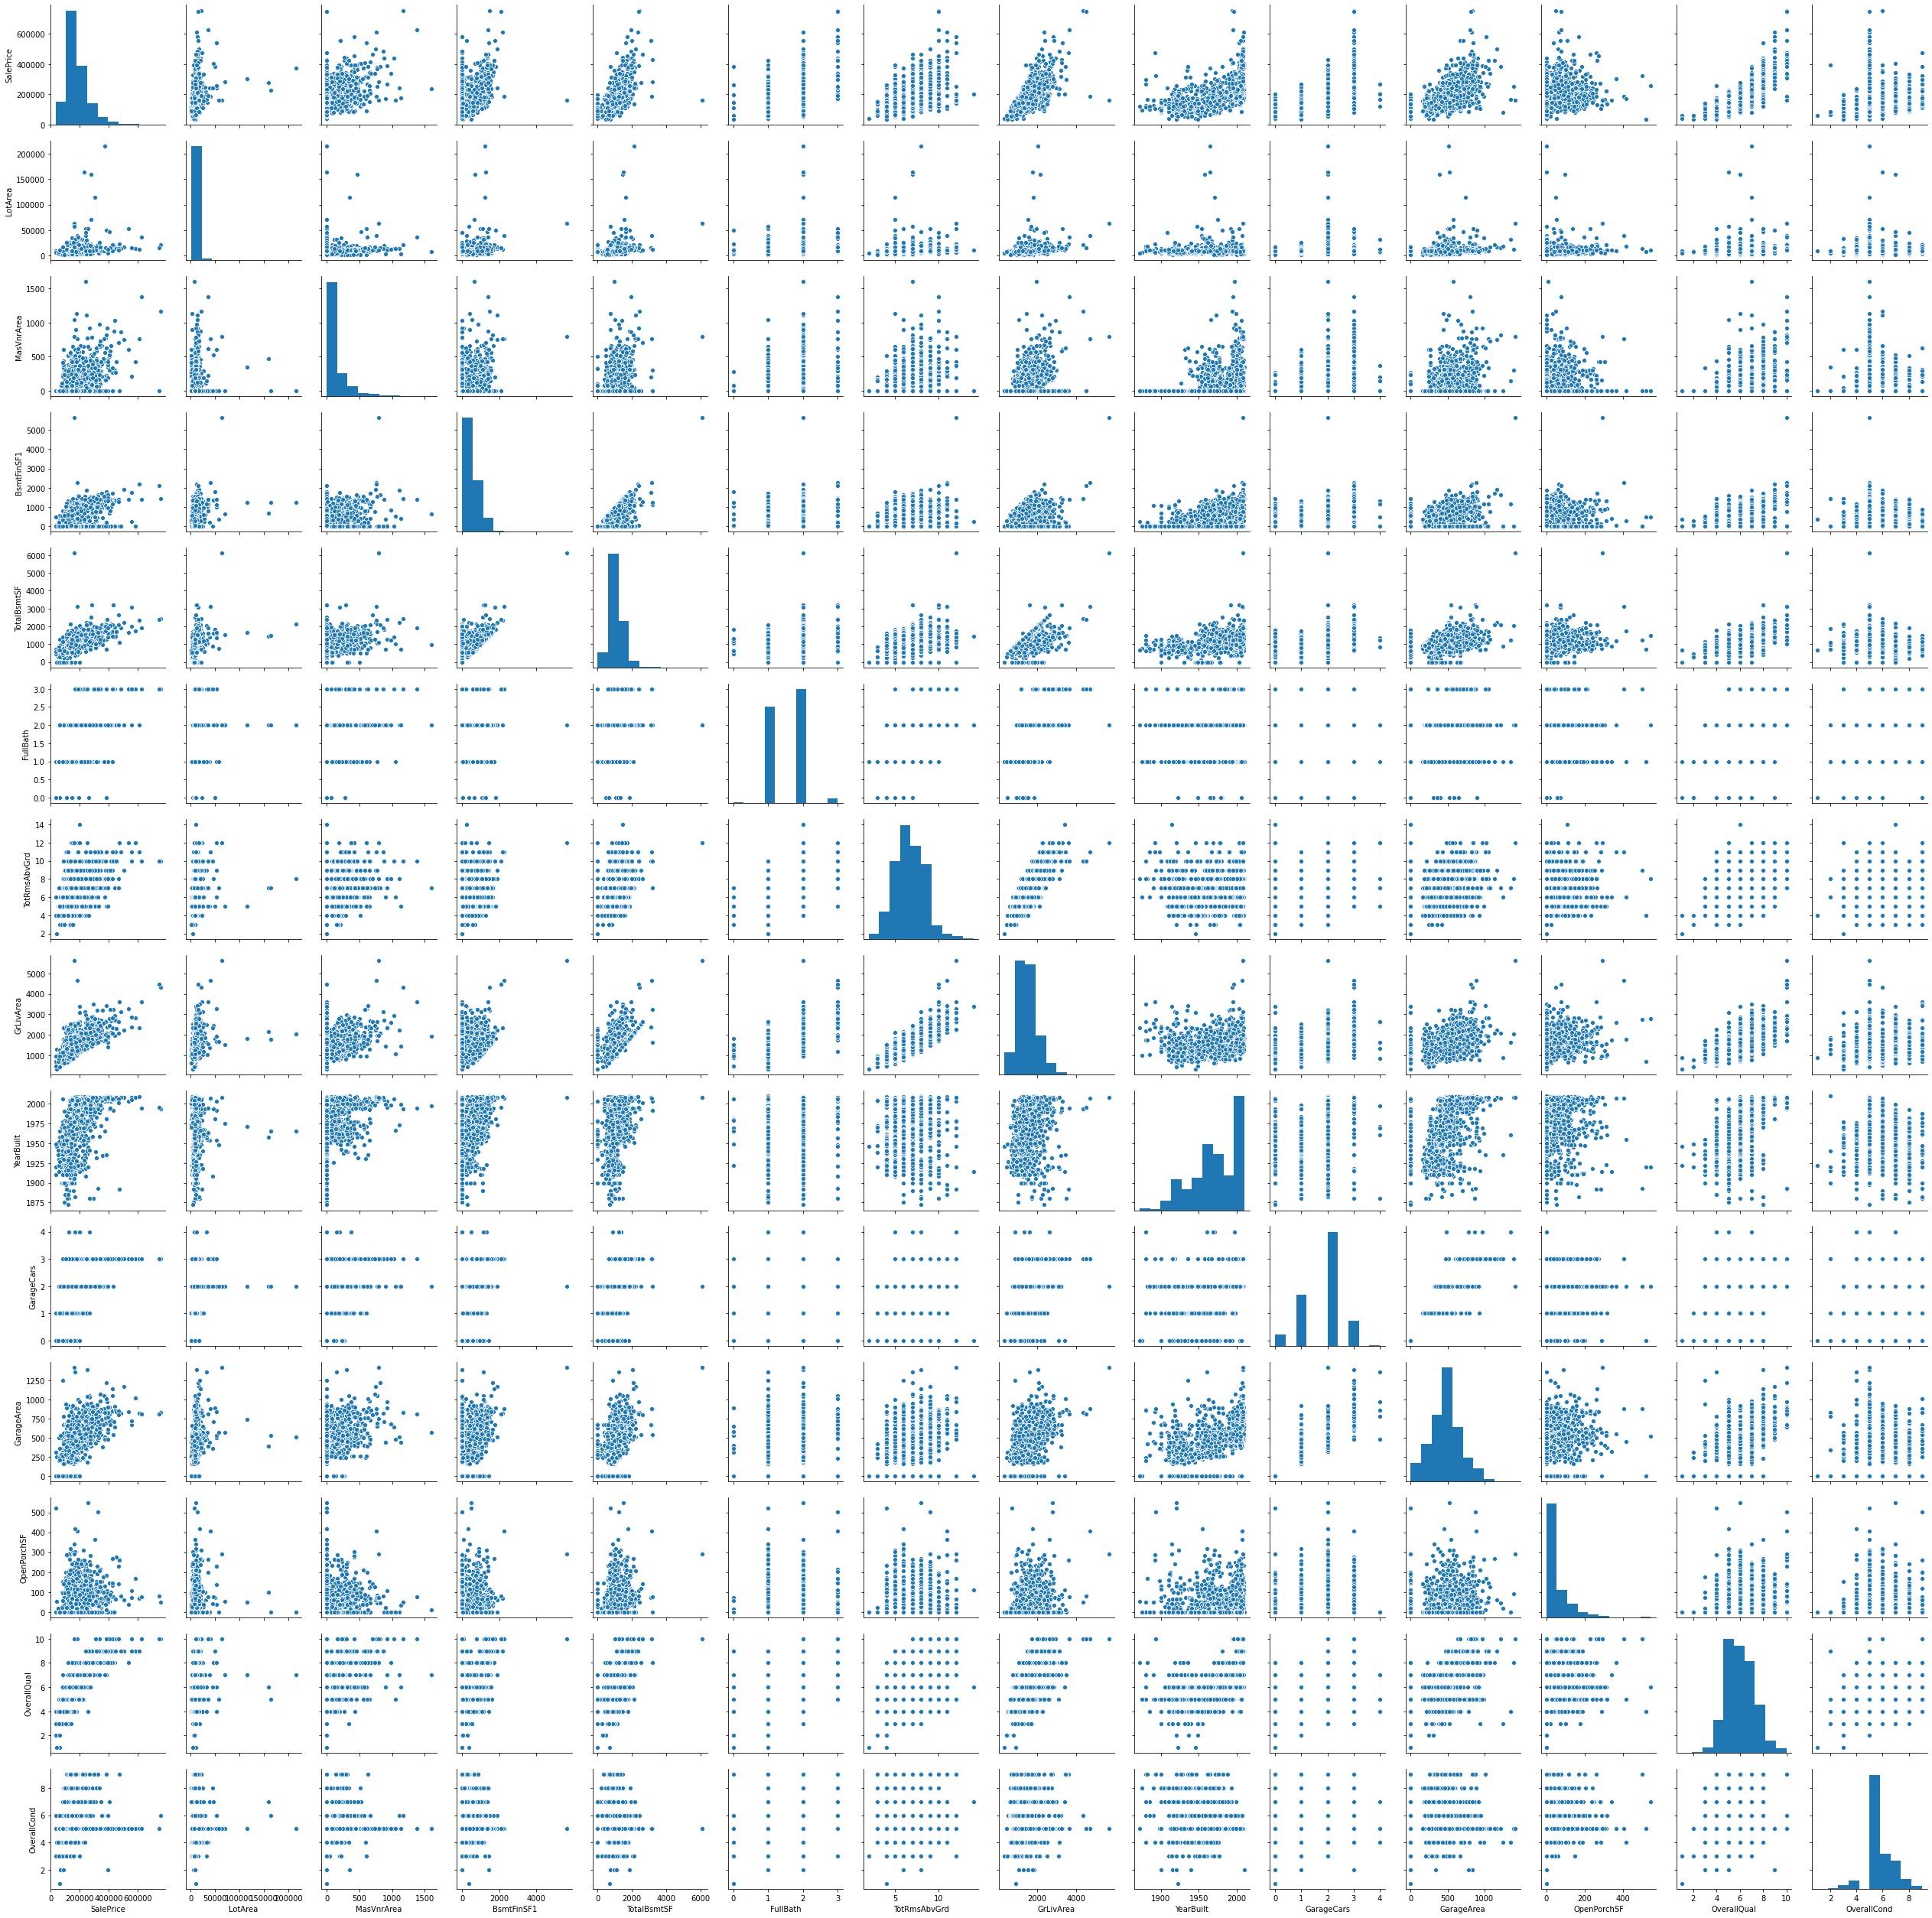

In [10]:
# Preparing a list with some numerical Variables for pair plot
num_var= ['SalePrice', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'FullBath','TotRmsAbvGrd',
          'GrLivArea', 'YearBuilt','GarageCars' , 'GarageArea', 'OpenPorchSF','OverallQual', 'OverallCond']

sns.pairplot(house_price[num_var])
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
From above pairplot it is evident that 'SalePrice' seems to be somewhat linearly correlated to the columns - 
'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'OpenPorchSF'
    
</div>    

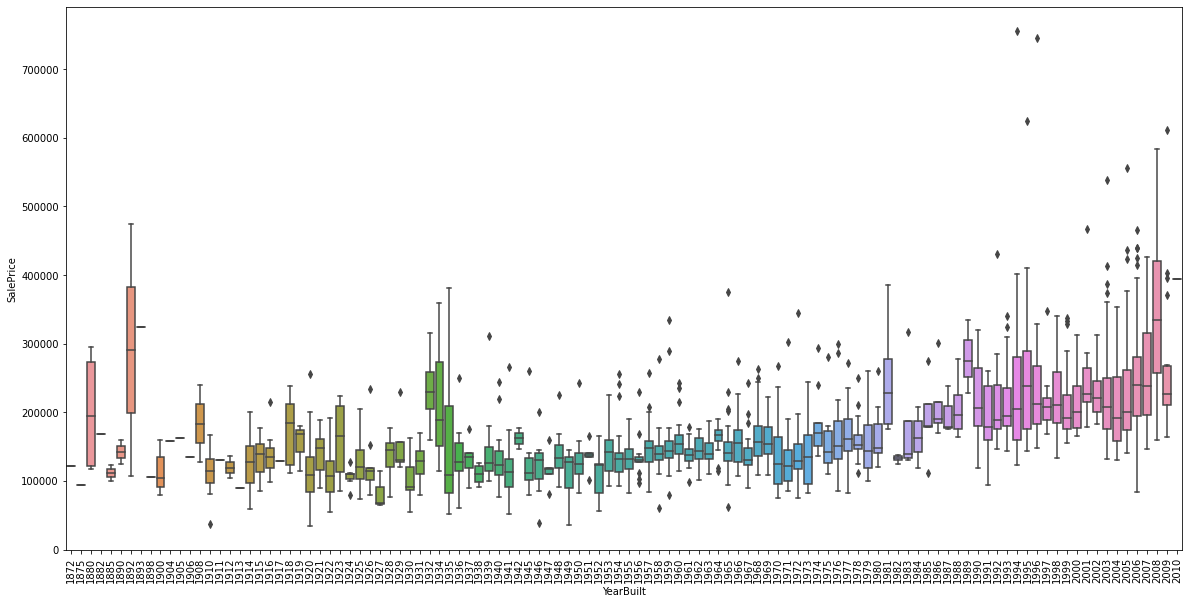

In [11]:
#Plotting Salesprice with the year built column

plt.figure(figsize=(20,10))
sns.boxplot(x="YearBuilt", y="SalePrice", data=house_price)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
From above boxplot it is evident that 'SalePrice' is higher for the houses built in recent years only with the exception in year 1892. Also in the year 1994 and 1995 some of the houses were sold at exceptionally high prices due to bigger house area and Overall Condition being very good.
    
</div>    

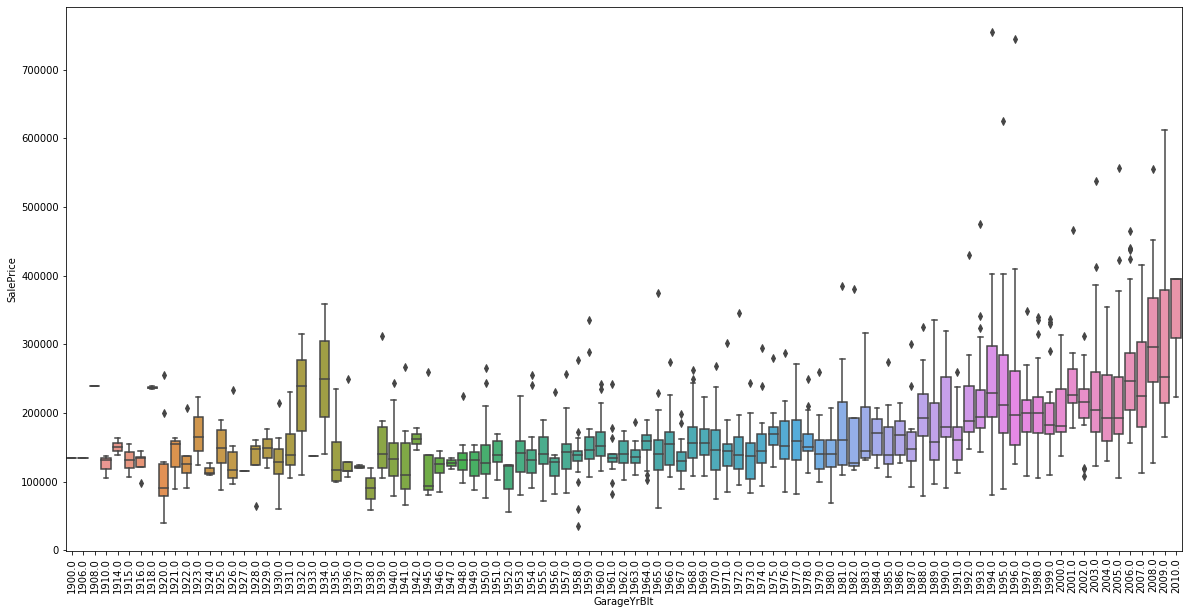

In [12]:

plt.figure(figsize=(20,10))
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=house_price)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
From above boxplot it is evident that 'SalePrice' is higher for the garages built in recent years only with the exception years 1994 and 1995. These were sold at exceptionally high prices due to bigger house area hence bigger garage and Overall Condition being very good.

    
</div>    

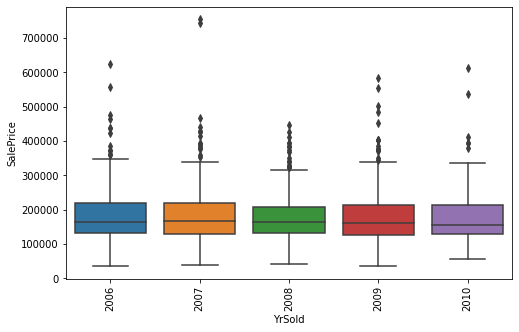

In [13]:

plt.figure(figsize=(8,5))
sns.boxplot(x="YrSold", y="SalePrice", data=house_price)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
The average 'SalePrice' of the houses sold every year seems to be similar arpund 170000$.There were some price exceptions in 2007 sold houses as the Overall Quality have been marked as 10 and the Living Area of these houses are above 4000sq ft
    
</div>    

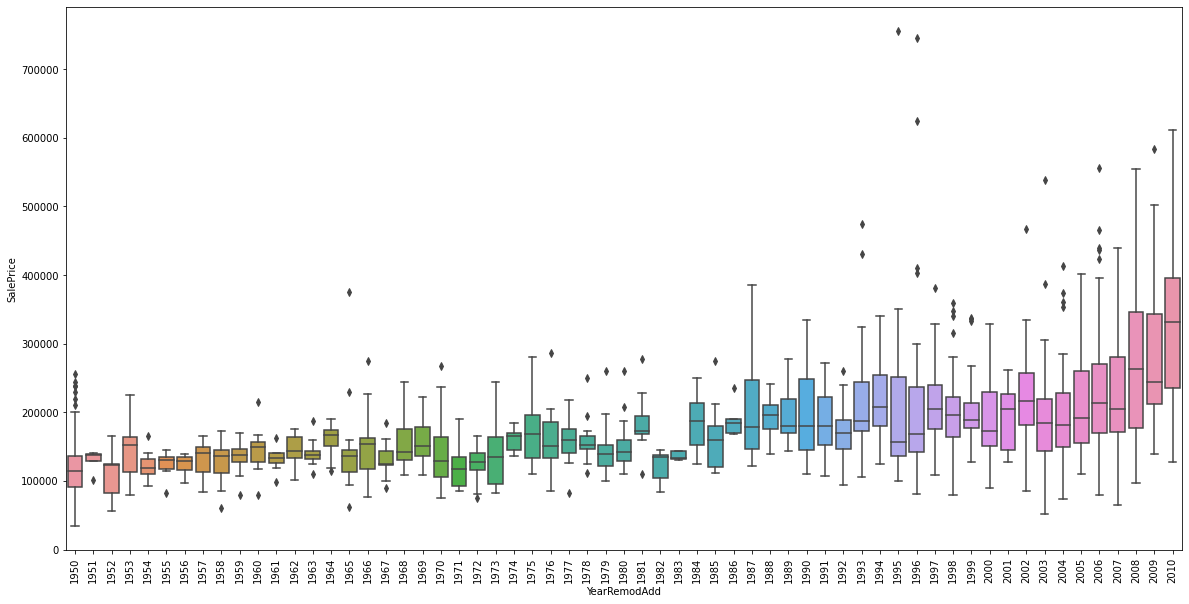

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x="YearRemodAdd", y="SalePrice", data=house_price)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
From above boxplot it is evident that 'SalePrice' is higher for the houses remodelled in recent years 
    
</div>    

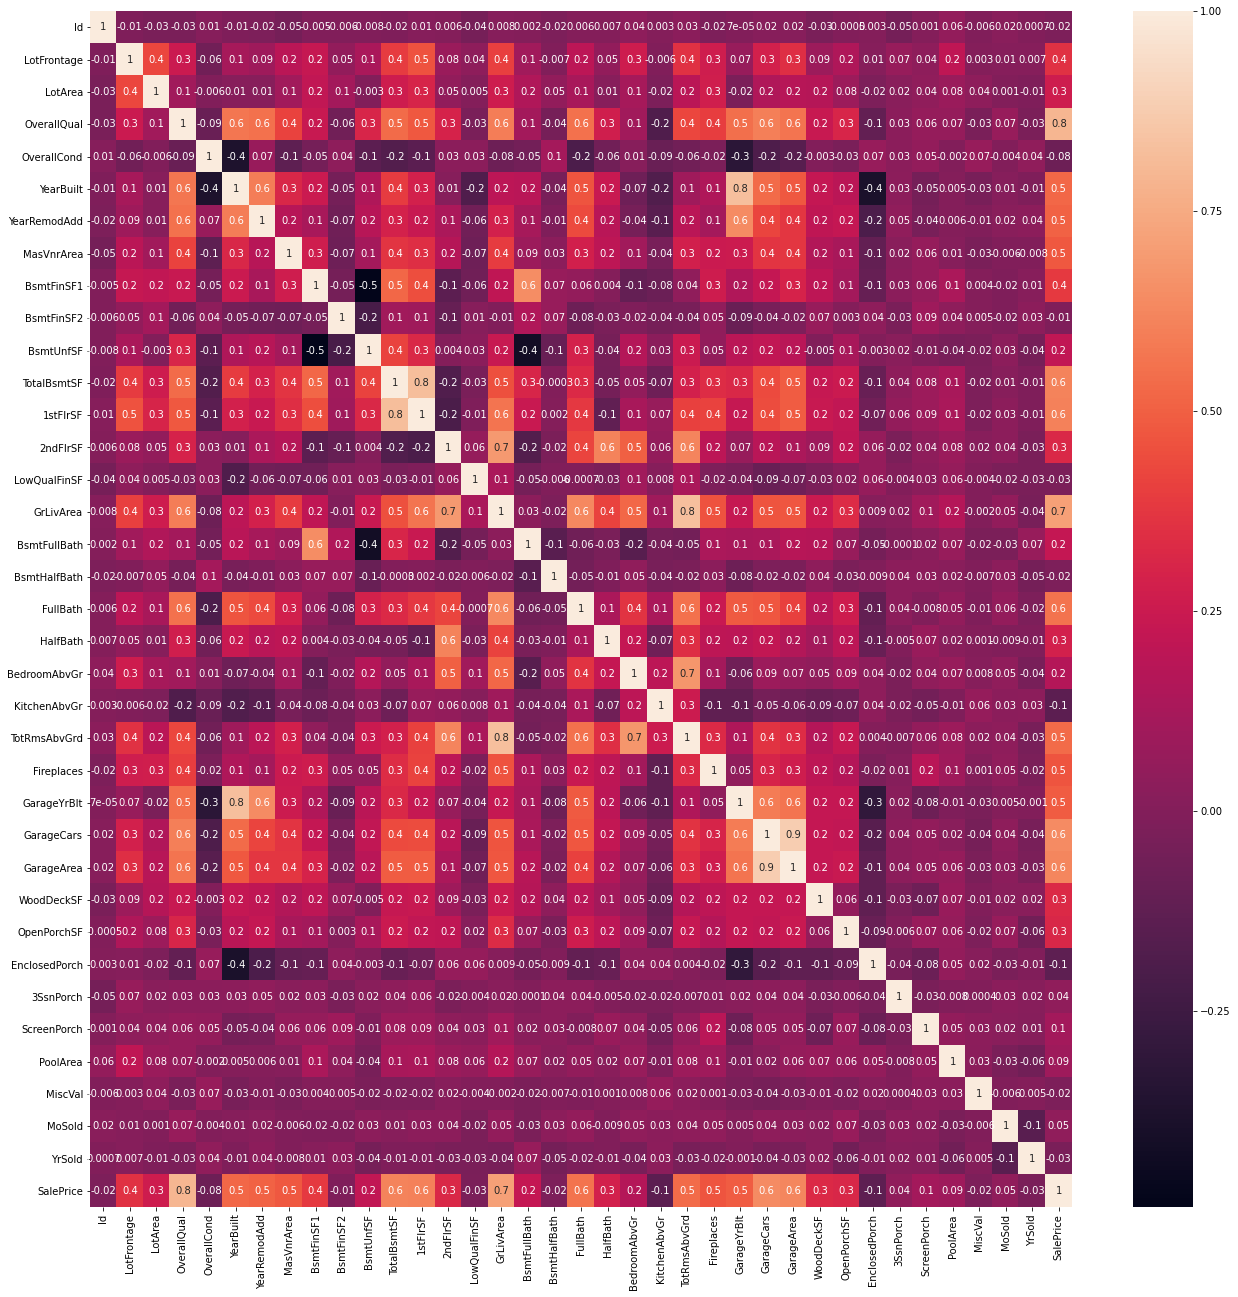

In [15]:
# Correlation Matrix
plt.subplots(figsize=(22, 22))
sns.heatmap(house_price.corr(),annot=True,fmt='.1g')
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
We can see from above correlation matrix some highly correlated columns to 'SalePrice' are:

- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
- GarageYrBlt
- YearRemodAdd

</div>    

### Exploring Categorical Variables

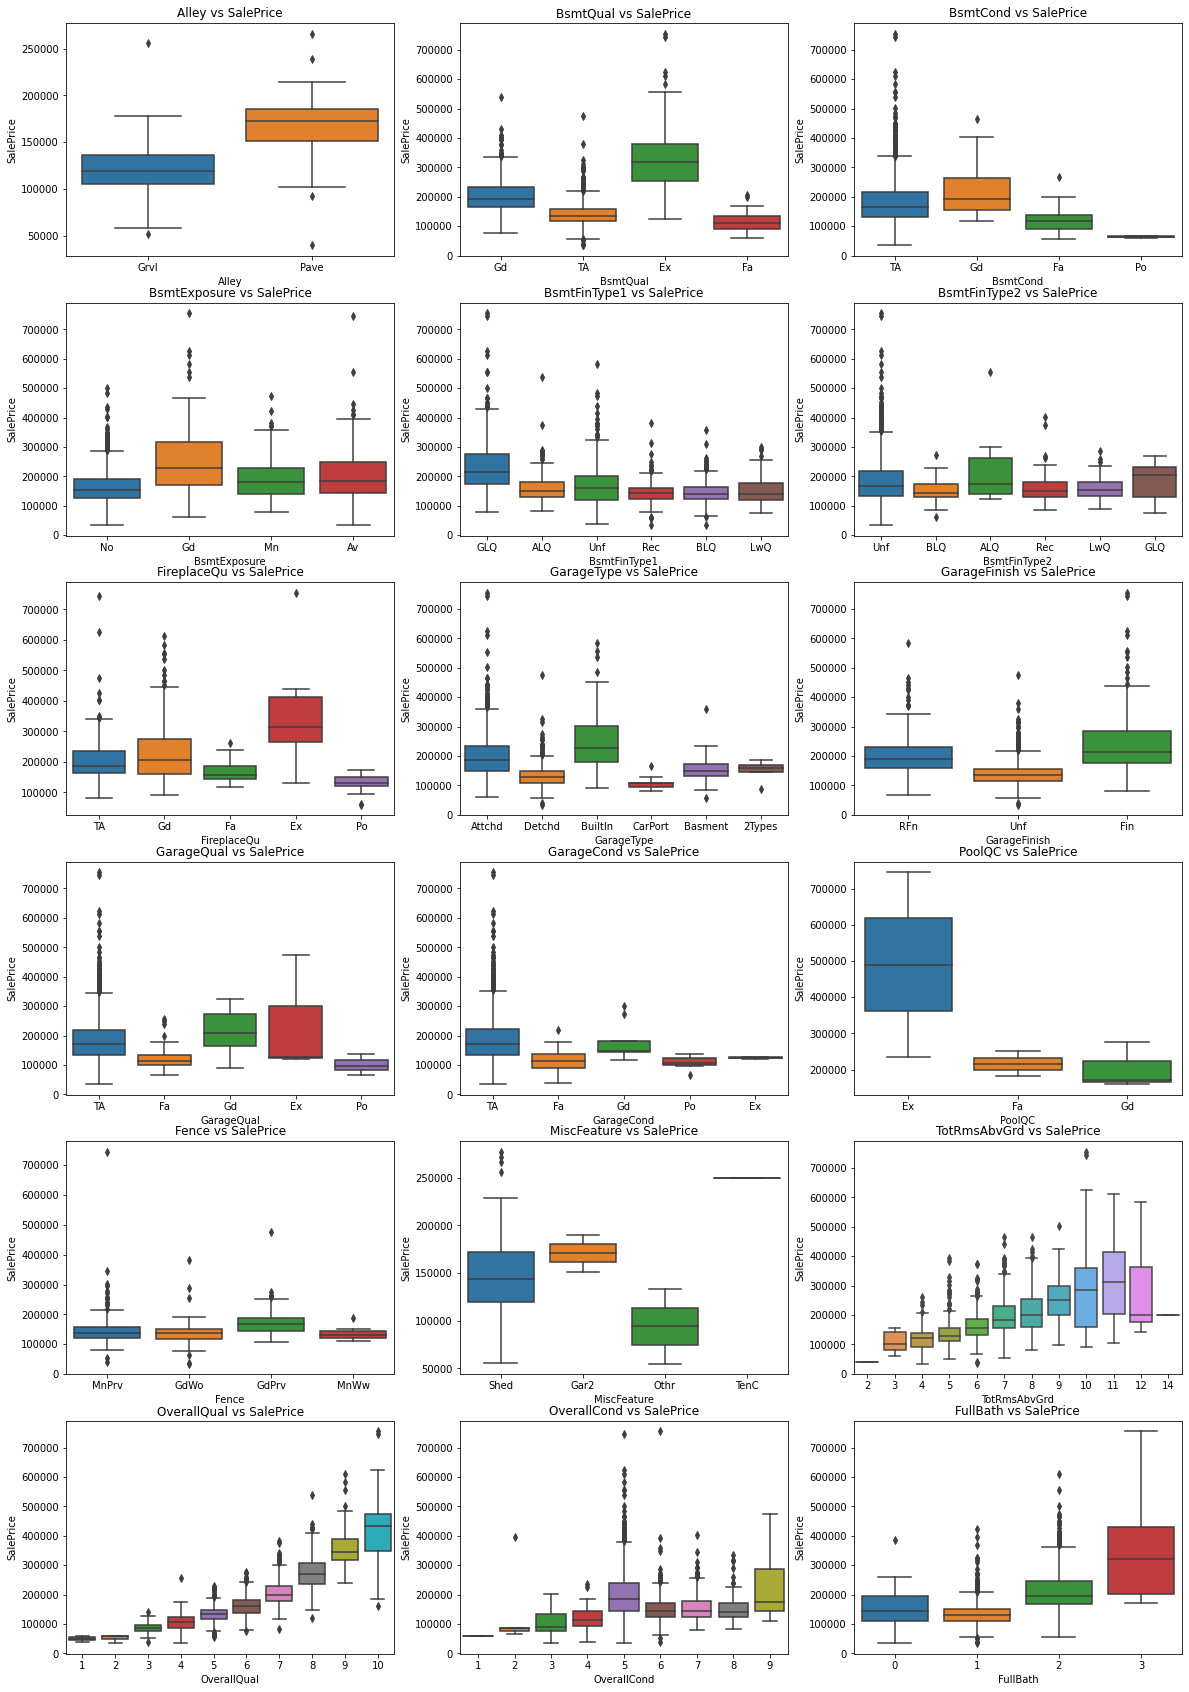

In [16]:
cat_var = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature",
           "TotRmsAbvGrd","OverallQual", "OverallCond","FullBath"] 
plt.figure(figsize=(20,30))
for i in enumerate(cat_var):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(x=i[1],y="SalePrice",data=house_price)
    plt.title(i[1]+" vs SalePrice")
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
From above boxplots it is evident that 

- 'SalePrice' is higher for houses with paved alley
- 'SalePrice' is higher for houses with typical basement quality but people prefer higher hieght for Basement i.e. excellent condition
- People prefer Good Exposure for their Gardens
- People prefer Good Living Quarter for the first Basement but average for second basement. Some people even prefer unfinished second basement so that they can modify according to their need.
- Exceptional Masonry Fireplace is preferred
- Built-in Garages are preferred that are finished and of excellent quality
- Pool Quality also excellent is preferred
- 'SalePrice' is higher for houses with Overall Quality higher
- 'SalePrice' is higher for houses with higher Overall Condition with the exception of some houses selling at higher price which have moderate Overall Cond of 5 as Living area is big and houses are made of Poured Concrete
- 'SalePrice' is higher for houses with more full Bathrooms

    
</div>    

# 3. Data Cleaning

### Dropping Duplicates & Rows with all missing values (if any)

In [17]:
# Drop rows and columns from the dataframe which are entirely having missing values, if any
house_price = house_price.dropna(axis =1, how='all')
house_price = house_price.dropna(axis =0, how='all')

# Checking for duplicates and dropping the entire duplicate row if any
house_price.drop_duplicates(subset=None, inplace=True)

house_price.shape

(1460, 81)

### Missing Value Check

In [18]:
# missing value check
missing_val = house_price.isnull().sum()
missing_percent = round(100*house_price.isnull().sum()/house_price.isnull().count(),2)
pd.concat([missing_val[missing_val!=0], 
           missing_percent[missing_percent!=0]], 
          axis=1, keys=['Value', 'Percentage']).sort_values(by='Value',ascending=False)

,Value,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
From above block we can see that there are lot of missing values for columns:

- PoolQC
- MiscFeature
- Alley
- Fence
- FireplaceQu
    
</div>    

### Missing Value Imputation

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
For some categorical fields if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Hence, rather than dropping it is better to fill in the null rows with a value called "Others" which can be categorized separately later.
    
</div>    

In [19]:
# Preparing the list of Categories with null values having meaning

Null_col = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", 
               "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [20]:
# Replacing Null Values with Others field

for i in Null_col:
    house_price[i].fillna("Others", inplace=True)
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Others,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,5,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Others,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Others,Others,Others,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Others,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,8,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Others,Others,Others,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Others,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,5,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Others,Others,Others,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Others,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,5,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Others,Others,Others,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Others,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,5,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Others,Others,Others,0,12,2008,WD,Normal,250000


In [21]:
# Checking Missing Values Again

missing_val = house_price.isnull().sum()
missing_percent = round(100*house_price.isnull().sum()/house_price.isnull().count(),2)
pd.concat([missing_val[missing_val!=0], 
           missing_percent[missing_percent!=0]], 
          axis=1, keys=['Value', 'Percentage']).sort_values(by='Value',ascending=False)

,Value,Percentage
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
The 'LotFrontage' column has lots of null values and doesnot seem to be of much business importance, hence this column will be dropped. Electrical column has just 1 missing row hence dropping the row along with the columns later.The categorical columns will be imputed with the Others field as done previously and the numerical columns will be imputed with median.
    
</div>    

In [22]:
# Creating a to_be_dropped list and adding columns to it and will drop the respective columns all together

to_drop_list = ["LotFrontage"]

In [23]:
# Dropping the row with 1 missing value

house_price = house_price.dropna(axis=0, subset=['Electrical'])

In [24]:
# Imputing Categorical and Numerical Values

house_price["MasVnrType"].fillna("Others", inplace=True)
house_price["GarageYrBlt"].fillna(house_price["GarageYrBlt"].median(), inplace=True)
house_price["MasVnrArea"].fillna(house_price["MasVnrArea"].median(), inplace=True)

In [25]:
house_price.shape

(1459, 81)

### Feature Engineering

#### Handling Year Columns

Converting the Year columns to calculate age of house 

In [26]:

currentYear = datetime.now().year
house_price['HouseAge'] = currentYear - house_price['YearBuilt']
house_price['GarageAge'] = currentYear - house_price['GarageYrBlt']
house_price['YearsfromLastRemod'] = currentYear - house_price['YearRemodAdd']
house_price['YearsfromLastSale'] = currentYear - house_price['YrSold']
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale
0,1,60,RL,65.0,8450,Pave,Others,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,5,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Others,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Others,Others,Others,0,2,2008,WD,Normal,208500,17,17.0,17,12
1,2,20,RL,80.0,9600,Pave,Others,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,8,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Others,Others,Others,0,5,2007,WD,Normal,181500,44,44.0,44,13
2,3,60,RL,68.0,11250,Pave,Others,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,5,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Others,Others,Others,0,9,2008,WD,Normal,223500,19,19.0,18,12
3,4,70,RL,60.0,9550,Pave,Others,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,5,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Others,Others,Others,0,2,2006,WD,Abnorml,140000,105,22.0,50,14
4,5,60,RL,84.0,14260,Pave,Others,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,5,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Others,Others,Others,0,12,2008,WD,Normal,250000,20,20.0,20,12


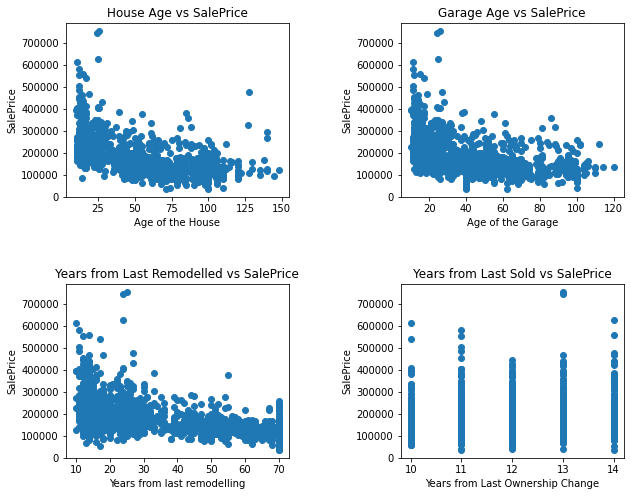

In [27]:
# Plotting the new columns and checking the relationship with target variable
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.scatter(x='HouseAge', y='SalePrice',data=house_price)
plt.title("House Age vs SalePrice")
plt.xlabel("Age of the House")
plt.ylabel("SalePrice")

plt.subplot(2,2,2)
plt.scatter(x='GarageAge', y='SalePrice',data=house_price)
plt.title("Garage Age vs SalePrice")
plt.xlabel("Age of the Garage")
plt.ylabel("SalePrice")

plt.subplot(2,2,3)
plt.scatter(x='YearsfromLastRemod', y='SalePrice',data=house_price)
plt.title("Years from Last Remodelled vs SalePrice")
plt.xlabel("Years from last remodelling")
plt.ylabel("SalePrice")

plt.subplot(2,2,4)
plt.scatter(x='YearsfromLastSale', y='SalePrice',data=house_price)
plt.title("Years from Last Sold vs SalePrice")
plt.xlabel("Years from Last Ownership Change")
plt.ylabel("SalePrice")

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
All the columns shown above shows people are ready to pay more for more recent built or remodelled house    
    
</div>    

In [28]:
# Adding all the previous yr rows to the deleted column list

to_drop_list.append("YearBuilt")
to_drop_list.append("GarageYrBlt")
to_drop_list.append("YearRemodAdd")
to_drop_list.append("YrSold")

to_drop_list

['LotFrontage', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold']

### Feature Skewness Check

In [29]:
# Checking the value_counts in every variables to understand the data better excluding the Id column
cat_var=house_price.select_dtypes("object")
print("Skewness of Each Feature \n")
for col in cat_var:
    print("Percentage Skewness in "+col+'\n')
    print(round(100*house_price[col].value_counts(normalize=True),2).sort_values(ascending=False), '\n')
    print("------------------------------------------")

Skewness of Each Feature 

Percentage Skewness in MSSubClass

20     36.74
60     20.49
50      9.87
120     5.96
30      4.73
160     4.32
70      4.11
80      3.91
90      3.56
190     2.06
85      1.37
75      1.10
45      0.82
180     0.69
40      0.27
Name: MSSubClass, dtype: float64 

------------------------------------------
Percentage Skewness in MSZoning

RL         78.82
RM         14.94
FV          4.46
RH          1.10
C (all)     0.69
Name: MSZoning, dtype: float64 

------------------------------------------
Percentage Skewness in Street

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64 

------------------------------------------
Percentage Skewness in Alley

Others    93.76
Grvl       3.43
Pave       2.81
Name: Alley, dtype: float64 

------------------------------------------
Percentage Skewness in LotShape

Reg    63.33
IR1    33.17
IR2     2.81
IR3     0.69
Name: LotShape, dtype: float64 

------------------------------------------
Percentage Skewness in Lan

In [30]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 43 columns):
MSSubClass       1459 non-null object
MSZoning         1459 non-null object
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     14

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
<b> From the above value_counts, we could see that the below variables has highly skewed data. So these will not significantly contribute to our model results as they have majority of 1 kind of value. Considering single value above 80% of all the values for dropping.
    Hence these variables will be dropped.</b>

- Street
- Alley
- LandContour
- Utilities
- LandSlope
- Condition1
- Condition2
- BldgType
- RoofMatl
- ExterCond
- BsmtCond
- BsmtFinType2
- Heating
- CentralAir
- Electrical
- Functional
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- SaleType
- SaleCondition
    
</div>    

In [31]:
# Creating a to be dropped list so that later all the variables to be dropped can be added to this list and dropped at one go

to_drop_list.append("Street")
to_drop_list.append("Alley")
to_drop_list.append("LandContour")
to_drop_list.append("Utilities")
to_drop_list.append("LandSlope")
to_drop_list.append("Condition1")
to_drop_list.append("Condition2")
to_drop_list.append("BldgType")
to_drop_list.append("RoofMatl")
to_drop_list.append("ExterCond")
to_drop_list.append("BsmtCond")
to_drop_list.append("BsmtFinType2")
to_drop_list.append("Heating")
to_drop_list.append("CentralAir")
to_drop_list.append("Electrical")
to_drop_list.append("Functional")
to_drop_list.append("GarageQual")
to_drop_list.append("GarageCond")
to_drop_list.append("PavedDrive")
to_drop_list.append("PoolQC")
to_drop_list.append("Fence")
to_drop_list.append("MiscFeature")
to_drop_list.append("SaleType")
to_drop_list.append("SaleCondition")
to_drop_list

['LotFrontage',
 'YearBuilt',
 'GarageYrBlt',
 'YearRemodAdd',
 'YrSold',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Checking ID variable

In [32]:
# Checking if this is a unique ID with no duplicates

house_price.duplicated(subset = 'Id').sum()

0

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
'Id' seems to be purely unique ID's, and will not make any significant contributions to our model results. Hence we will add it to the <b> 'to_drop_list'.</b>     
    
</div>    

In [33]:
to_drop_list.append('Id')
print(to_drop_list)

['LotFrontage', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold', 'Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Id']


### Creating new dataframe by removing the columns to be dropped

In [34]:
new_hp=house_price[house_price.columns[~house_price.columns.isin(to_drop_list)]]

In [35]:
# Checking shape of new Dataframe
new_hp.shape

(1459, 55)

In [36]:
# Checking Missing Values Again

missing_val = new_hp.isnull().sum()
missing_percent = round(100*new_hp.isnull().sum()/new_hp.isnull().count(),2)
pd.concat([missing_val[missing_val!=0], 
           missing_percent[missing_percent!=0]], 
          axis=1, keys=['Value', 'Percentage']).sort_values(by='Value',ascending=False)

,Value,Percentage


<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
All the missing values are treated and Data is ready to be used for Modelling</b>     
    
</div>    

In [37]:
## Checking % of data retained

print("Data Retained after Cleaning "+str(round((100*new_hp.shape[0]/1460),2))+"%")

Data Retained after Cleaning 99.93%


In [38]:
new_hp.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,5,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Others,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,208500,17,17.0,17,12
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,8,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,181500,44,44.0,44,13
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,5,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,223500,19,19.0,18,12
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,5,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,140000,105,22.0,50,14
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,5,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,250000,20,20.0,20,12


# 4. Data Preparation

### Target Variable Transformation

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
As was seen in the Exploratory Data Analysis, the target variable is highly skewed hence transformation like a logarithm would make it more normally distributed.Generally normally distributed targets helps in enhancing model performance</b>     
    
</div>    

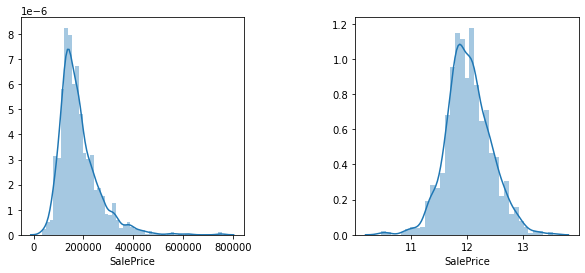

In [39]:
# Plotting comparative normal and log transformed target variable graph

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.distplot(new_hp['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(np.log(new_hp["SalePrice"]))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
As was seen from above plots, Normal Distribution looks good,hence transforming the variable </b>     
    
</div>    

In [40]:
# New Variable Created

new_hp["ModifiedSalePrice"] = np.log(new_hp["SalePrice"])

In [41]:
# Dropping the previous 'SalePrice' column

new_hp.drop("SalePrice",axis=1,inplace=True)
new_hp.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale,ModifiedSalePrice
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,5,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Others,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,17,17.0,17,12,12.247694
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,8,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,44,44.0,44,13,12.109011
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,5,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,19,19.0,18,12,12.317167
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,5,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,105,22.0,50,14,11.849398
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,5,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,20,20.0,20,12,12.429216


### Dummy Variable Creation

In [42]:
# Creating a list of numerical variables on the basis of datatype
num_var = new_hp.select_dtypes(include=["int64","float64"])
num_var.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrType', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'HouseAge', 'GarageAge', 'YearsfromLastRemod',
       'YearsfromLastSale', 'ModifiedSalePrice'],
      dtype='object')

In [43]:
# Creating a list of categorical variables on the basis of datatype
cat_var = new_hp.select_dtypes(include="object")
cat_var.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')

In [44]:
# Create dummy variables for categorical varaibles and concatenating them to the original dataframe

cat_dummy=pd.get_dummies(cat_var,drop_first=True)
new_hp = pd.concat([new_hp,cat_dummy],axis=1)
new_hp.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Others,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageFinish_Others,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,5,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Others,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,8,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,5,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,5,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,5,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [45]:
# Dropping the original categorical variables from the master dataframe
new_hp.drop(cat_var, axis = 1, inplace = True)
new_hp.head()

,LotArea,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale,ModifiedSalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Others,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageFinish_Others,GarageFinish_RFn,GarageFinish_Unf
0,8450,7,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,17,17.0,17,12,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,9600,6,8,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,44,44.0,44,13,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,11250,7,5,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,19,19.0,18,12,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,9550,7,5,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,105,22.0,50,14,11.849398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,14260,8,5,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,20,20.0,20,12,12.429216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [46]:
# Checking Shape
new_hp.shape

(1459, 169)

In [47]:
# Checking other info of dataframe
new_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 169 entries, LotArea to GarageFinish_Unf
dtypes: float64(3), int64(33), uint8(133)
memory usage: 611.2 KB


# 5. Model Building

### Splitting data into test and train

In [48]:
# Splitting Data with a 70-30 ratio

df_train, df_test = train_test_split(new_hp, test_size = 0.3, random_state = 100)

In [49]:
# Checking Shape

df_train.shape, df_test.shape

((1021, 169), (438, 169))

### Scaling Numerical Variables

In [50]:
# Create a scaling object
scaler = StandardScaler()

# Scale train variables using 'fit_transform'
df_train[num_var.columns] = scaler.fit_transform(df_train[num_var.columns])

# Scale test variables using 'transform'
df_test[num_var.columns] = scaler.transform(df_test[num_var.columns])

In [51]:
df_train.head()

,LotArea,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale,ModifiedSalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Others,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageFinish_Others,GarageFinish_RFn,GarageFinish_Unf
984,-0.049244,-0.790233,-0.512364,-0.512364,-0.555867,-0.931228,-0.299629,-1.265589,-2.274081,0.320038,0.206085,-0.123208,0.399579,-0.826986,-0.241465,0.789648,-0.755902,1.399721,4.407570,0.917605,-0.963636,0.302190,0.302095,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.633710,-0.195445,0.058581,0.352223,-0.890540,-0.704494,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1416,0.067048,-1.500469,0.384932,0.384932,-0.555867,-0.931228,-0.299629,0.464070,-0.607802,0.179679,1.610886,-0.123208,1.449374,-0.826986,-0.241465,0.789648,-0.755902,1.399721,4.407570,2.780178,-0.963636,0.302190,0.399400,-0.729730,-0.702191,1.435413,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,2.818107,0.306419,1.638960,-1.638888,-0.774191,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
390,-0.213872,-0.790233,2.179524,2.179524,-0.555867,-0.422211,1.997881,-0.755819,-0.427663,-0.534650,0.146404,-0.123208,-0.293361,1.087646,-0.241465,-1.022106,-0.755902,1.399721,-0.207947,0.296747,-0.963636,-1.027708,-0.416110,-0.729730,1.144341,1.403785,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,2.326767,0.017275,1.638960,-0.142193,-0.845909,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
877,-0.172811,2.050710,-0.512364,-0.512364,0.591698,1.539931,-0.299629,-0.615576,0.861183,0.721065,0.963575,-0.123208,1.324758,1.087646,-0.241465,0.789648,1.269756,1.399721,-0.207947,2.159320,0.578484,1.632089,1.224177,0.708584,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.098625,-1.079857,-1.056689,-0.982172,-0.890540,1.823151,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
567,-0.044841,0.630239,-0.512364,-0.512364,0.336684,-0.927003,-0.299629,2.106912,0.979131,0.904033,-0.785539,-0.123208,0.023843,-0.826986,-0.241465,0.789648,-0.755902,0.180339,-0.207947,0.296747,-0.963636,0.302190,0.269660,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-1.197128,-1.079857,-1.056689,-0.934515,-1.638888,0.606010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [52]:
df_train.describe()

,LotArea,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale,ModifiedSalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Others,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageFinish_Others,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,1.930113e-18,1.690888e-16,-3.193658e-16,-3.193658e-16,-7.546472e-17,-2.609731e-18,-1.404905e-16,9.438527e-17,4.920430e-17,1.419993e-16,-6.720057e-17,4.093200e-16,-1.924677e-16,1.404905e-16,7.084332e-17,4.314755e-16,-6.785300e-17,1.443507e-17,-4.489281e-16,-1.488634e-16,-7.231129e-17,2.275903e-16,-3.175173e-17,2.490118e-17,1.335312e-16,-4.485475e-17,-9.408624e-17,-4.244075e-16,-2.339243e-17,-8.519684e-16,1.286652e-16,-7.252877e-17,-1.500595e-17,6.643940e-17,1.405993e-16,-3.178217e-15,0.043095,0.002938,0.011753,0.099902,0.204701,0.042116,0.011753,0.044074,0.013712,0.036239,0.061704,0.039177,0.005877,0.021548,...,0.0,0.099902,0.003918,0.017630,0.334966,0.138100,0.028404,0.009794,0.336925,0.614104,0.421156,0.448580,0.021548,0.003918,0.001959,0.024486,0.420176,0.031342,0.435847,0.100881,0.076396,0.633692,0.031342,0.105779,0.286974,0.039177,0.031342,0.088149,0.299706,0.036239,0.158668,0.000979,0.294809,0.029383,0.398629,0.501469,0.020568,0.269344,0.464251,0.010774,0.214496,0.600392,0.013712,0.062684,0.006856,0.258570,0.053869,0.053869,0.287953,0.408423
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00

As expected proper scaling is done

In [53]:
df_test.head()

,LotArea,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale,ModifiedSalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Others,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageFinish_Others,GarageFinish_RFn,GarageFinish_Unf
789,0.149840,-0.079997,2.179524,2.179524,0.278243,0.268446,-0.299629,-0.677906,-0.489854,-0.497053,1.764679,-0.123208,1.066085,-0.826986,-0.241465,0.789648,1.269756,2.619102,-0.207947,1.538462,-0.963636,0.302190,-0.138095,0.309921,1.684096,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.267543,0.164871,0.512951,-1.077486,0.606154,0.278944,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
425,-0.695025,0.630239,2.179524,2.179524,-0.555867,-0.931228,-0.299629,0.183585,-0.878009,-1.171279,0.779941,-0.123208,-0.251823,-0.826986,-0.241465,-1.022106,1.269756,0.180339,-0.207947,-0.324111,2.120604,-1.027708,-1.083345,-0.729730,-0.702191,1.625176,-0.121132,-0.273,-0.054189,-0.077724,0.999878,0.819991,1.297770,-0.362632,-0.890540,-0.533800,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
204,-0.683348,-0.790233,1.282228,1.282228,-0.555867,-0.272252,-0.299629,-0.357351,-0.730038,-1.138696,0.509081,-0.123208,-0.450075,-0.826986,-0.241465,-1.022106,1.269756,-1.039042,-0.207947,-0.944968,-0.963636,-1.027708,-1.083345,-0.729730,-0.205048,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,0.787235,1.256464,1.638960,-0.890540,-1.040478,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
118,0.166207,0.630239,-0.512364,-0.512364,-0.555867,2.173561,-0.299629,-0.813696,1.313673,1.315085,2.710395,-0.123208,3.209102,1.087646,-0.241465,2.601402,-0.755902,2.619102,-0.207947,2.780178,2.120604,1.632089,0.556942,2.139081,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.464793,-0.621273,-0.478400,-0.267318,-1.638888,1.601444,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
244,-0.168408,0.630239,-0.512364,-0.512364,-0.555867,0.536683,-0.299629,-0.702393,-0.241092,0.119525,1.252799,-0.123208,1.109512,1.087646,-0.241465,0.789648,1.269756,0.180339,-0.207947,0.917605,2.120604,0.302190,-0.050057,-0.729730,1.144341,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.464793,-0.752297,-0.643626,-0.839201,-1.638888,0.499709,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [54]:
df_test.describe()

,LotArea,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale,ModifiedSalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Others,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageFinish_Others,GarageFinish_RFn,GarageFinish_Unf
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,-0.038939,-0.029729,0.014132,0.014132,-0.025484,0.021407,-0.086336,-0.008630,-0.018088,-0.095226,0.034960,0.000574,-0.042927,-0.040151,-0.016318,0.003727,0.062686,0.057845,0.023883,-0.009430,-0.058785,-0.025730,-0.011931,0.023122,-0.129812,-0.066373,-0.040008,0.024007,0.148393,0.022610,0.065231,-0.022990,-0.020825,-0.072990,-0.014052,-0.039061,0.057078,0.002283,0.0,0.095890,0.205479,0.038813,0.009132,0.027397,0.013699,0.034247,0.054795,0.052511,0.009132,0.018265,...,0.002283,0.091324,0.002283,0.018265,0.367580,0.127854,0.020548,0.009132,0.328767,0.634703,0.465753,0.429224,0.004566,0.004566,0.002283,0.022831,0.429224,0.011416,0.465753,0.070776,0.082192,0.696347,0.013699,0.091324,0.285388,0.077626,0.011416,0.098174,0.280822,0.027397,0.178082,0.0,0.289954,0.020548,0.406393,0.509132,0.027397,0.239726,0.490868,0.020548,0.214612,0.586758,0.011416,0.052511,0.004566,0.280822,0.059361,0.059361,0.292237,0.429224
std,0.842432,0.939588,0.995791,0.995791,0.860586,0.871526,0.811247,0.945215,0.783400,0.888488,1.006921,1.084632,0.974062,0.978023,0.936174,0.994153,1.059155,0.982283,1.056452,1.031172,0.979229,0.980145,0.969533,0.931746,0.779611,0.882646,0.773110,1.118441,2.131100,0.873093,0.965504,0.963360,0.969801,0.943051,0.980480,0.960930,0.232256,0.047782,0.0,0.294778,0.404514,0.193369,0.095235,0.163425,0.116370,0.182070,0.227839,0.223311,0.095235,0.134061,...,0.047782,0.288399,0.047782,0.134061,0.482697,0.334309,0.142027,0.095235,0.470302,0.48

In [55]:
# Split the train dataset into X and y
y_train = df_train.pop('ModifiedSalePrice')
X_train = df_train

# Split the test dataset into X and y
y_test = df_test.pop('ModifiedSalePrice')
X_test = df_test

In [56]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             
rfe = rfe.fit(X_train, y_train)

In [57]:
#Listing the variables that's automatically ranked using RFE - all the ones ranked as 1 are considered top 50 variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', False, 57),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrType', True, 1),
 ('MasVnrArea', False, 109),
 ('BsmtFinSF1', False, 5),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', False, 4),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 52),
 ('BsmtHalfBath', False, 106),
 ('FullBath', False, 64),
 ('HalfBath', False, 67),
 ('BedroomAbvGr', False, 108),
 ('KitchenAbvGr', False, 74),
 ('TotRmsAbvGrd', False, 77),
 ('Fireplaces', False, 104),
 ('GarageCars', True, 1),
 ('GarageArea', False, 82),
 ('WoodDeckSF', False, 89),
 ('OpenPorchSF', False, 117),
 ('EnclosedPorch', False, 94),
 ('3SsnPorch', False, 100),
 ('ScreenPorch', False, 90),
 ('PoolArea', False, 37),
 ('MiscVal', False, 119),
 ('MoSold', False, 118),
 ('HouseAge', True, 1),
 ('GarageAge', False, 110),
 ('YearsfromLastRemod', False, 70),
 ('YearsfromLastSale', False, 98),
 ('MSSubClass_30', True,

In [58]:
# Creating a list of the top 50 variables selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'MasVnrType', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageCars', 'HouseAge', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'HouseStyle_1Story', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Foundation_Wood',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_Others', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtExposure_Others', 'BsmtFinType1_Others',
       'BsmtFinType1_Unf', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_Others', 'F

In [59]:
# Creating X_train & X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

### Ridge Model

In [60]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [61]:
# Applying Ridge
ridge = Ridge()

# Applying cross validation as 5 folds
folds = 5
ridgeregressor = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeregressor.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
ridge_cv_results = pd.DataFrame(ridgeregressor.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=200]
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003784,0.001240,0.001835,0.000041,0.0001,{'alpha': 0.0001},-0.216554,-0.245997,-0.264840,-0.231197,-0.232750,-0.238268,0.016234,23,-0.229740,-0.223257,-0.209323,-0.209901,-0.223599,-0.219164,0.008135
1,0.002786,0.000063,0.001737,0.000029,0.001,{'alpha': 0.001},-0.216552,-0.245983,-0.264835,-0.231167,-0.232748,-0.238257,0.016235,22,-0.229738,-0.223256,-0.209326,-0.209903,-0.223599,-0.219164,0.008134
2,0.002759,0.000006,0.001740,0.000012,0.01,{'alpha': 0.01},-0.216526,-0.245853,-0.264791,-0.230871,-0.232732,-0.238155,0.016242,21,-0.229713,-0.223251,-0.209353,-0.209921,-0.223594,-0.219166,0.008116
3,0.002874,0.000247,0.001822,0.000161,0.05,{'alpha': 0.05},-0.216409,-0.245298,-0.264638,-0.229662,-0.232665,-0.237735,0.016289,20,-0.229609,-0.223232,-0.209456,-0.209996,-0.223573,-0.219173,0.008042
4,0.002770,0.000045,0.001723,0.000012,0.1,{'alpha': 0.1},-0.216260,-0.244707,-0.264517,-0.228350,-0.232645,-0.237296,0.016371,18,-0.229490,-0.223206,-0.209557,-0.210076,-0.223554,-0.219177,0.007964


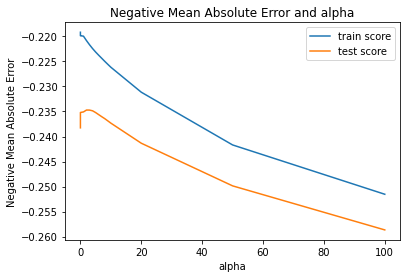

In [63]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
The plot represents various values of negative mean square error for test and train data with varying values of Alpha     
    
</div>    

#### Hyperparameter Tuning

In [64]:
# Building the first ridge model
ridge1 = Ridge(alpha=50)

ridge1.fit(X_train_rfe, y_train)

y_train_pred = ridge1.predict(X_train_rfe)
print("Train R-Square Value for alpha=50: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge1.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=50: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# Ridge coefficients
print()
print("Coefficients are:")
print(ridge1.coef_)

rcoef1 = pd.Series(ridge1.coef_, index = X_train_rfe.columns)
print()
print("Top 10 Coefficient ")
rcoef1.reindex(rcoef1.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha=50: 
0.8715602325140255

Test R-Square Value for alpha=50: 
0.875542513455318

Coefficients are:
[ 0.27087034  0.06893045  0.06893045  0.13306976  0.10049167  0.00584915
  0.1834271   0.1560642  -0.21496649 -0.09777037 -0.0059194  -0.03845058
 -0.14371737 -0.03174266  0.10656631  0.01703881  0.0924799  -0.09052392
 -0.0446167  -0.00097192  0.10398962  0.1388176  -0.02270358  0.08586908
  0.13433786  0.06081165  0.01089931  0.00570089 -0.02868842  0.09697229
 -0.00100562 -0.03085859 -0.00100562 -0.00376098 -0.05349133 -0.01725505
 -0.01479296 -0.03707471 -0.11941755 -0.06652165  0.14786937 -0.11941755
 -0.11941755 -0.13008299 -0.0107661  -0.0643246  -0.01673127 -0.1080959
 -0.13540302 -0.04942475]

Top 10 Coefficient 


OverallQual             0.270870
HouseAge               -0.214966
GrLivArea               0.183427
GarageCars              0.156064
BsmtExposure_Gd         0.147869
MSSubClass_160         -0.143717
Neighborhood_Crawfor    0.138818
FireplaceQu_Others     -0.135403
Neighborhood_NridgHt    0.134338
1stFlrSF                0.133070
dtype: float64

In [65]:
# Building the second ridge model changing Alpha
ridge2 = Ridge(alpha=20)

ridge2.fit(X_train_rfe, y_train)
print("Train R-Square Value for alpha=20: ")
y_train_pred = ridge2.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print()
print("Test R-Square Value for alpha=20: ")
y_test_pred = ridge2.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# Ridge coefficients
print()
print("Coefficients are:")
print(ridge2.coef_)

rcoef2 = pd.Series(ridge2.coef_, index = X_train_rfe.columns)
print()
print("Top 10 Coefficient ")
rcoef2.reindex(rcoef2.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha=20: 
0.8808014254819704

Test R-Square Value for alpha=20: 
0.8765235218110754

Coefficients are:
[ 0.25690909  0.06858317  0.06858317  0.11742166  0.11228653  0.00885285
  0.18160994  0.15148546 -0.21801092 -0.15974001 -0.02106208 -0.07338356
 -0.2337202  -0.0769124   0.19539927  0.05002007  0.11552756 -0.05825343
 -0.09020881 -0.00638045  0.18099645  0.22310491 -0.03819212  0.14726652
  0.18946891  0.09352906  0.03127182  0.00952819 -0.0614652   0.15892364
 -0.00284142 -0.05398477 -0.00284142 -0.0131706  -0.09321391 -0.0398873
 -0.03672995 -0.07330376 -0.16687079 -0.10867897  0.17974107 -0.16687079
 -0.16687079 -0.14651144 -0.02588357 -0.11630175 -0.04945979 -0.14117186
 -0.14213165 -0.10171494]

Top 10 Coefficient 


OverallQual             0.256909
MSSubClass_160         -0.233720
Neighborhood_Crawfor    0.223105
HouseAge               -0.218011
MSZoning_FV             0.195399
Neighborhood_NridgHt    0.189469
GrLivArea               0.181610
Neighborhood_ClearCr    0.180996
BsmtExposure_Gd         0.179741
BsmtQual_Others        -0.166871
dtype: float64

In [66]:
# Building the third ridge model changing Alpha

ridge3 = Ridge(alpha=10)

ridge3.fit(X_train_rfe, y_train)

y_train_pred = ridge3.predict(X_train_rfe)
print("Train R-Square Value for alpha=10: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge3.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=10: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# Ridge coefficients
print()
print("Coefficients are:")
print(ridge3.coef_)

rcoef3 = pd.Series(ridge3.coef_, index = X_train_rfe.columns)
print()
print("Top 10 Coefficient ")
rcoef3.reindex(rcoef3.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha=10: 
0.8860075860351672

Test R-Square Value for alpha=10: 
0.8750189746982413

Coefficients are:
[ 0.24320559  0.06730751  0.06730751  0.10751351  0.11832926  0.01076682
  0.17928779  0.1482988  -0.21696075 -0.2089277  -0.04722251 -0.10106286
 -0.29873715 -0.14067082  0.2913571   0.10820661  0.16423464  0.00564914
 -0.13636073 -0.01654465  0.24337707  0.28235003 -0.04877689  0.19843584
  0.22229771  0.1136851   0.05945617  0.01399449 -0.10664471  0.20160011
 -0.00623797 -0.07230172 -0.00623797 -0.03129767 -0.12684547 -0.07155544
 -0.06951091 -0.10192259 -0.19891571 -0.14857777  0.19308133 -0.19891571
 -0.19891571 -0.15361792 -0.05021974 -0.1654693  -0.07682945 -0.1716363
 -0.14493409 -0.15583565]

Top 10 Coefficient 


MSSubClass_160         -0.298737
MSZoning_FV             0.291357
Neighborhood_Crawfor    0.282350
Neighborhood_ClearCr    0.243377
OverallQual             0.243206
Neighborhood_NridgHt    0.222298
HouseAge               -0.216961
MSSubClass_30          -0.208928
Exterior1st_BrkFace     0.201600
BsmtFinType1_Others    -0.198916
dtype: float64

In [67]:
# Building the fourth ridge model changing Alpha
ridge4 = Ridge(alpha=4)

ridge4.fit(X_train_rfe, y_train)

y_train_pred = ridge4.predict(X_train_rfe)
print("Train R-Square Value for alpha=4: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge4.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=4: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# Ridge coefficients
print()
print("Coefficients are:")
print(ridge4.coef_)

rcoef4 = pd.Series(ridge4.coef_, index = X_train_rfe.columns)
print()
print("Top 10 Coefficient Values for Double of Optimum Value")
rcoef4.reindex(rcoef4.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha=4: 
0.8908582390524541

Test R-Square Value for alpha=4: 
0.8718954364824991

Coefficients are:
[ 0.22594641  0.06518922  0.06518922  0.09839412  0.1223937   0.01312515
  0.17597232  0.14567896 -0.2128811  -0.25931467 -0.10908136 -0.13056976
 -0.36306235 -0.25825292  0.47103258  0.26101121  0.29609404  0.15789484
 -0.19744001 -0.04211057  0.30784732  0.33857053 -0.05957876  0.25385982
  0.24799452  0.13046314  0.10915659  0.02916013 -0.20862877  0.24073454
 -0.01556263 -0.08010704 -0.01556263 -0.07319494 -0.16591693 -0.13967561
 -0.12483284 -0.13432093 -0.23146211 -0.19829314  0.20182775 -0.23146211
 -0.23146211 -0.15876736 -0.11444266 -0.22523109 -0.11060642 -0.21055285
 -0.14747826 -0.22912039]

Top 10 Coefficient Values for Double of Optimum Value


MSZoning_FV             0.471033
MSSubClass_160         -0.363062
Neighborhood_Crawfor    0.338571
Neighborhood_ClearCr    0.307847
MSZoning_RL             0.296094
MSZoning_RH             0.261011
MSSubClass_30          -0.259315
MSSubClass_180         -0.258253
Neighborhood_NoRidge    0.253860
Neighborhood_NridgHt    0.247995
dtype: float64

In [68]:
# Building the fifth ridge model changing Alpha
ridge5 = Ridge(alpha=2)

ridge5.fit(X_train_rfe, y_train)

y_train_pred = ridge5.predict(X_train_rfe)
print("Train R-Square Value for alpha=2: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge5.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=2: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# Ridge coefficients
print()
print("Coefficients are:")
print(ridge5.coef_)

rcoef5 = pd.Series(ridge5.coef_, index = X_train_rfe.columns)
print()
print("Top 10 Coefficient Values for Optimum Value")
rcoef5.reindex(rcoef5.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha=2: 
0.8934505474502389

Test R-Square Value for alpha=2: 
0.8696874153510462

Coefficients are:
[ 0.21524384  0.06358754  0.06358754  0.09412371  0.12350893  0.01485923
  0.1738279   0.14525495 -0.20900789 -0.28341656 -0.17315791 -0.14535718
 -0.39544505 -0.34833354  0.64447834  0.43341887  0.4436485   0.31744273
 -0.23207362 -0.06961504  0.33700968  0.36438296 -0.07261302  0.28221829
  0.25836417  0.1370326   0.14514507  0.05965024 -0.32870508  0.25778544
 -0.02675574 -0.05327123 -0.02675574 -0.11172215 -0.18866926 -0.20684858
 -0.1641827  -0.15168037 -0.24816826 -0.2267597   0.20538654 -0.24816826
 -0.24816826 -0.1607954  -0.19612178 -0.25712329 -0.13042042 -0.23364239
 -0.14868657 -0.27343707]

Top 10 Coefficient Values for Optimum Value


MSZoning_FV             0.644478
MSZoning_RL             0.443649
MSZoning_RH             0.433419
MSSubClass_160         -0.395445
Neighborhood_Crawfor    0.364383
MSSubClass_180         -0.348334
Neighborhood_ClearCr    0.337010
Exterior1st_BrkComm    -0.328705
MSZoning_RM             0.317443
MSSubClass_30          -0.283417
dtype: float64

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
Analysing 5 models, the model 5 seems to be good model as it gives better score than others and also the variation between test R2 score and train R2 score is very less  
    
</div>    

In [69]:
# Choosing the best Ridge model
ridge = ridge5

In [70]:
# Ridge coefficients
ridge.coef_

array([ 0.21524384,  0.06358754,  0.06358754,  0.09412371,  0.12350893,
        0.01485923,  0.1738279 ,  0.14525495, -0.20900789, -0.28341656,
       -0.17315791, -0.14535718, -0.39544505, -0.34833354,  0.64447834,
        0.43341887,  0.4436485 ,  0.31744273, -0.23207362, -0.06961504,
        0.33700968,  0.36438296, -0.07261302,  0.28221829,  0.25836417,
        0.1370326 ,  0.14514507,  0.05965024, -0.32870508,  0.25778544,
       -0.02675574, -0.05327123, -0.02675574, -0.11172215, -0.18866926,
       -0.20684858, -0.1641827 , -0.15168037, -0.24816826, -0.2267597 ,
        0.20538654, -0.24816826, -0.24816826, -0.1607954 , -0.19612178,
       -0.25712329, -0.13042042, -0.23364239, -0.14868657, -0.27343707])

In [71]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.035),
 ('OverallQual', 0.215),
 ('OverallCond', 0.064),
 ('MasVnrType', 0.064),
 ('1stFlrSF', 0.094),
 ('2ndFlrSF', 0.124),
 ('LowQualFinSF', 0.015),
 ('GrLivArea', 0.174),
 ('GarageCars', 0.145),
 ('HouseAge', -0.209),
 ('MSSubClass_30', -0.283),
 ('MSSubClass_40', -0.173),
 ('MSSubClass_120', -0.145),
 ('MSSubClass_160', -0.395),
 ('MSSubClass_180', -0.348),
 ('MSZoning_FV', 0.644),
 ('MSZoning_RH', 0.433),
 ('MSZoning_RL', 0.444),
 ('MSZoning_RM', 0.317),
 ('LotShape_IR3', -0.232),
 ('LotConfig_FR3', -0.07),
 ('Neighborhood_ClearCr', 0.337),
 ('Neighborhood_Crawfor', 0.364),
 ('Neighborhood_NPkVill', -0.073),
 ('Neighborhood_NoRidge', 0.282),
 ('Neighborhood_NridgHt', 0.258),
 ('HouseStyle_1Story', 0.137),
 ('RoofStyle_Mansard', 0.145),
 ('RoofStyle_Shed', 0.06),
 ('Exterior1st_BrkComm', -0.329),
 ('Exterior1st_BrkFace', 0.258),
 ('Exterior1st_CBlock', -0.027),
 ('Exterior2nd_Brk Cmn', -0.053),
 ('Exterior2nd_CBlock', -0.027),
 ('Exterior2nd_Stone', -0.112),
 ('Exte

In [72]:
print("Total Features = "+str(sum(ridge.coef_ != 0)))

Total Features = 50


### Conclusion - Ridge Model

#### Top features

In [73]:
#The top 10 features for best model
rcoef = pd.Series(ridge.coef_, index = X_train_rfe.columns)
rcoef.reindex(rcoef.abs().sort_values(ascending=False)[:10].index)

MSZoning_FV             0.644478
MSZoning_RL             0.443649
MSZoning_RH             0.433419
MSSubClass_160         -0.395445
Neighborhood_Crawfor    0.364383
MSSubClass_180         -0.348334
Neighborhood_ClearCr    0.337010
Exterior1st_BrkComm    -0.328705
MSZoning_RM             0.317443
MSSubClass_30          -0.283417
dtype: float64

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>

- Mostly people are interested to pay high price for home in Floating Village Residential Zones
- The house prices are high for areas which are Residential but with Low Density, Residential Medium Density and Residential High Density with the prices being more on higher end for places with low density
- People do not prefer '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER' and '1-STORY 1945 & OLDER' types of dwelling so house price is less for these categories.
- The house prices are high for houses with Brick Common exterior as it is sturdier. 
    
</div>    

#### Best Optimum alpha score for Ridge

In [74]:
# This value is depicted by the model 5 mentioned above
print(ridgeregressor.best_params_)
print(ridgeregressor.best_score_)

{'alpha': 2.0}
-0.23471029907274218


<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
This is same value as optimal alpha selected from final model 
</div>    

In [75]:
# Score calculation at optimum value
y_train_pred = ridgeregressor.predict(X_train_rfe)

r_score_tr = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("Train R2 Square Value: ",r_score_tr)

Train R2 Square Value:  0.8934505474502389


In [76]:
# Score calculation at optimum value

y_test_pred = ridgeregressor.predict(X_test_rfe)
r_score_tst = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("Test R2 Square Value: ",r_score_tst)

Test R2 Square Value:  0.8696874153510462


#### Residual

Text(0.5, 0, 'Errors')

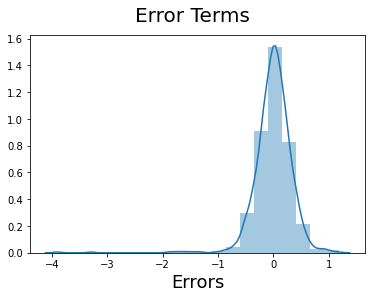

In [77]:
fig = plt.figure()
sns.distplot((y_train - ridge2.predict(X_train_rfe)), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
The residual of errors seems to be fairly normally distributed  
    
</div>    

### Lasso Model

In [78]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lassoregressor = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassoregressor.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
lasso_cv_results = pd.DataFrame(lassoregressor.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006856,0.000907,0.001989,0.000130,0.0001,{'alpha': 0.0001},-0.216324,-0.244344,-0.265213,-0.226208,-0.232946,-0.237007,0.016795,2,-0.229529,-0.223178,-0.209835,-0.210507,-0.223719,-0.219353,0.007824
1,0.009283,0.000944,0.001740,0.000030,0.001,{'alpha': 0.001},-0.213121,-0.238537,-0.265484,-0.219481,-0.236152,-0.234555,0.018230,1,-0.230269,-0.226468,-0.213701,-0.215023,-0.224800,-0.222052,0.006538
2,0.003511,0.000207,0.001756,0.000040,0.01,{'alpha': 0.01},-0.251658,-0.259816,-0.292648,-0.259144,-0.268661,-0.266385,0.014194,3,-0.267172,-0.264377,-0.246904,-0.251662,-0.261428,-0.258309,0.007738
3,0.003074,0.000255,0.001775,0.000011,0.05,{'alpha': 0.05},-0.283594,-0.299994,-0.317392,-0.298735,-0.290730,-0.298089,0.011322,4,-0.301094,-0.300215,-0.284933,-0.283164,-0.297575,-0.293396,0.007740
4,0.003225,0.000274,0.001830,0.000059,0.1,{'alpha': 0.1},-0.324295,-0.329837,-0.339621,-0.328682,-0.319189,-0.328325,0.006778,5,-0.330656,-0.330955,-0.319224,-0.313150,-0.329587,-0.324714,0.007237


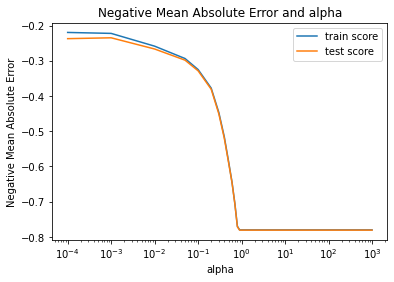

In [80]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
The plot represents various values of negative mean square error for test and train data with varying values of Alpha     
    
</div>    

#### Hyperparameter Tuning

In [81]:
# Building 1st Lasso Model
lasso1 = Lasso(alpha=0)

lasso1.fit(X_train_rfe, y_train)

y_train_pred = lasso1.predict(X_train_rfe)
print("Train R-Square Value for alpha=0: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso1.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=0: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# The top 10 features
print()
print("Top 10 Coefficients")
lcoef1 = pd.Series(lasso1.coef_, index = X_train_rfe.columns)
lcoef1.reindex(lcoef1.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha=0: 
0.8969551284262527

Test R-Square Value for alpha=0: 
0.862656270535504

Top 10 Coefficients


Exterior1st_BrkComm   -1.271887
MSZoning_FV            1.208303
MSZoning_RH            1.030551
MSZoning_RL            0.953825
MSZoning_RM            0.849049
BsmtQual_Others       -0.720709
HeatingQC_Po          -0.631194
MSSubClass_180        -0.528417
Exterior2nd_Brk Cmn    0.525343
MSSubClass_160        -0.462523
dtype: float64

In [82]:
# Building 2nd Lasso Model
lasso2 = Lasso(alpha=0.01)

lasso2.fit(X_train_rfe, y_train)

y_train_pred = lasso2.predict(X_train_rfe)
print("Train R-Square Value for alpha=.01: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso2.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=.01: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# The top 10 features
print()
print("Top 10 Coefficients")
lcoef2 = pd.Series(lasso2.coef_, index = X_train_rfe.columns)
lcoef2.reindex(lcoef2.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha=.01: 
0.854132642868381

Test R-Square Value for alpha=.01: 
0.8693387124240878

Top 10 Coefficients


OverallQual           0.316422
GrLivArea             0.282384
HouseAge             -0.232927
GarageCars            0.157207
OverallCond           0.137781
FireplaceQu_Others   -0.127386
BsmtExposure_Gd       0.124792
MSZoning_RM          -0.114773
BsmtFinType1_Unf     -0.112813
BsmtQual_Others      -0.109101
dtype: float64

In [83]:
# Building 3rd Lasso Model
lasso3 = Lasso(alpha=0.001)

lasso3.fit(X_train_rfe, y_train)

y_train_pred = lasso3.predict(X_train_rfe)
print("Train R-Square Value for alpha=.001: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso3.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=.001: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# The top 10 features
print()
print("Top 10 Coefficients for Optimal Value")
lcoef3 = pd.Series(lasso3.coef_, index = X_train_rfe.columns)
lcoef3.reindex(lcoef3.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha=.001: 
0.8904058611744827

Test R-Square Value for alpha=.001: 
0.8731443876110826

Top 10 Coefficients for Optimal Value


MSZoning_FV             0.581667
BsmtQual_Others        -0.571126
MSSubClass_160         -0.390553
MSZoning_RL             0.378390
Neighborhood_Crawfor    0.346437
MSZoning_RH             0.336420
Neighborhood_ClearCr    0.317889
GrLivArea               0.313355
Neighborhood_NridgHt    0.265631
Neighborhood_NoRidge    0.257849
dtype: float64

In [84]:
# Building 4th Lasso Model
lasso4 = Lasso(alpha=0.002)

lasso4.fit(X_train_rfe, y_train)

y_train_pred = lasso4.predict(X_train_rfe)
print("Train R-Square Value for alpha = .002: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso4.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=.002: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# The top 10 features
print()
print("Top 10 Coefficients for Double of Optimal Value")
lcoef4 = pd.Series(lasso4.coef_, index = X_train_rfe.columns)
lcoef4.reindex(lcoef4.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha = .002: 
0.8832589491023066

Test R-Square Value for alpha=.002: 
0.8747346875620908

Top 10 Coefficients for Double of Optimal Value


BsmtQual_Others        -0.478469
MSSubClass_160         -0.346025
GrLivArea               0.323466
MSZoning_FV             0.314547
Neighborhood_Crawfor    0.310987
Neighborhood_ClearCr    0.272355
Neighborhood_NridgHt    0.258563
OverallQual             0.253646
HouseAge               -0.228618
Neighborhood_NoRidge    0.201470
dtype: float64

In [85]:
# Building 5th Lasso Model
lasso5 = Lasso(alpha=0.0001)

lasso5.fit(X_train_rfe, y_train)

y_train_pred = lasso5.predict(X_train_rfe)
print("Train R-Square Value for alpha = .0001: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso5.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha =.0001: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


# The top 10 features
print()
print("Top 10 Coefficients")
lcoef5 = pd.Series(lasso5.coef_, index = X_train_rfe.columns)
print(list((lcoef5.abs().sort_values(ascending=False)[:10].index)))
lcoef5.reindex(lcoef5.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha = .0001: 
0.8967779825861707

Test R-Square Value for alpha =.0001: 
0.8653275701340755

Top 10 Coefficients
['MSZoning_FV', 'Exterior1st_BrkComm', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'BsmtQual_Others', 'HeatingQC_Po', 'MSSubClass_180', 'MSSubClass_160', 'Neighborhood_Crawfor']


MSZoning_FV             1.141745
Exterior1st_BrkComm    -0.993683
MSZoning_RH             0.960812
MSZoning_RL             0.894011
MSZoning_RM             0.784537
BsmtQual_Others        -0.680224
HeatingQC_Po           -0.520756
MSSubClass_180         -0.498027
MSSubClass_160         -0.449221
Neighborhood_Crawfor    0.392971
dtype: float64

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
Analysing 5 models, the model 3 seems to be good model as it gives better test score than others and also the variation between test R2 score and train R2 score is the least in this case    
    
</div>    

In [86]:
# Choosing the best lasso model

lasso = lasso3

In [87]:
# Model Coefficients
lasso.coef_

array([ 2.28064139e-01,  1.29423708e-01,  2.45749661e-17,  0.00000000e+00,
        7.47667076e-03,  0.00000000e+00,  3.13354572e-01,  1.45145840e-01,
       -2.17472556e-01, -2.49614964e-01, -0.00000000e+00, -1.17395396e-01,
       -3.90553476e-01, -2.49922855e-01,  5.81667032e-01,  3.36419817e-01,
        3.78389789e-01,  2.36660303e-01, -1.68653503e-01, -0.00000000e+00,
        3.17889218e-01,  3.46436867e-01, -0.00000000e+00,  2.57849257e-01,
        2.65630683e-01,  1.17306259e-01,  2.36953015e-03,  0.00000000e+00,
       -1.96773132e-01,  2.33537825e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.41341910e-01, -0.00000000e+00,
       -6.74288393e-02, -1.11851888e-01, -5.71126135e-01, -1.61635058e-01,
        2.01657808e-01, -9.13749332e-02, -7.16340817e-18, -1.54195287e-01,
       -0.00000000e+00, -2.03937509e-01, -9.54258200e-02, -1.95299572e-01,
       -1.42757272e-01, -2.12953618e-01])

In [88]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.053),
 ('OverallQual', 0.228),
 ('OverallCond', 0.129),
 ('MasVnrType', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.007),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.313),
 ('GarageCars', 0.145),
 ('HouseAge', -0.217),
 ('MSSubClass_30', -0.25),
 ('MSSubClass_40', -0.0),
 ('MSSubClass_120', -0.117),
 ('MSSubClass_160', -0.391),
 ('MSSubClass_180', -0.25),
 ('MSZoning_FV', 0.582),
 ('MSZoning_RH', 0.336),
 ('MSZoning_RL', 0.378),
 ('MSZoning_RM', 0.237),
 ('LotShape_IR3', -0.169),
 ('LotConfig_FR3', -0.0),
 ('Neighborhood_ClearCr', 0.318),
 ('Neighborhood_Crawfor', 0.346),
 ('Neighborhood_NPkVill', -0.0),
 ('Neighborhood_NoRidge', 0.258),
 ('Neighborhood_NridgHt', 0.266),
 ('HouseStyle_1Story', 0.117),
 ('RoofStyle_Mansard', 0.002),
 ('RoofStyle_Shed', 0.0),
 ('Exterior1st_BrkComm', -0.197),
 ('Exterior1st_BrkFace', 0.234),
 ('Exterior1st_CBlock', -0.0),
 ('Exterior2nd_Brk Cmn', -0.0),
 ('Exterior2nd_CBlock', -0.0),
 ('Exterior2nd_Stone', -0.0),
 ('Exterior2nd_Stucco', -0.14

### Conclusion - Lasso Model

#### Top features

In [89]:
# The top 10 features
lcoef = pd.Series(lasso.coef_, index = X_train_rfe.columns)
lcoef.reindex(lcoef.abs().sort_values(ascending=False)[:10].index)

MSZoning_FV             0.581667
BsmtQual_Others        -0.571126
MSSubClass_160         -0.390553
MSZoning_RL             0.378390
Neighborhood_Crawfor    0.346437
MSZoning_RH             0.336420
Neighborhood_ClearCr    0.317889
GrLivArea               0.313355
Neighborhood_NridgHt    0.265631
Neighborhood_NoRidge    0.257849
dtype: float64

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
     
- Mostly people are interested to pay high price for home in Floating Village Residential Zones
- People are not willing to purchase the house if there is No Basement 
- People donot prefer 2-STORY PUD - 1946 & NEWER type of dwelling
- The house prices are high for areas which are Residential but with Low Density and Residential High Density with the prices being more on higher end for places with low density
- The house prices are high for houses in Crawford,Clear Creek, Northridge Heights and North Ames within Ames city limits
- The house prices are directly proportional to the square feet of the house

</div>   

#### Best alpha score

In [90]:
print(lassoregressor.best_params_)
print(lassoregressor.best_score_)

{'alpha': 0.001}
-0.23455497492262567


<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
This is same value as optimal alpha selected from final model 
</div>    

#### Variables eliminated by Lasso

In [91]:
print("Lasso picked " + str(sum(lcoef != 0)) + " variables and eliminated the other " +  str(sum(lcoef == 0)) + " variables")
print("Total Features = "+str(sum(lcoef != 0)))

Lasso picked 38 variables and eliminated the other 12 variables
Total Features = 38


In [92]:
# Score calculation at optimal value
y_train_pred = lassoregressor.predict(X_train_rfe)

l_score_tr=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("Train R2 Square Value: ",l_score_tr)

Train R2 Square Value:  0.8904058611744827


In [93]:
# Score Calculation for Test Optimum alpha value
y_test_pred = lassoregressor.predict(X_test_rfe)

l_score_tst = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("Test R2 Square Value: ",l_score_tst)

Test R2 Square Value:  0.8731443876110826


#### Residual

Text(0.5, 0, 'Errors')

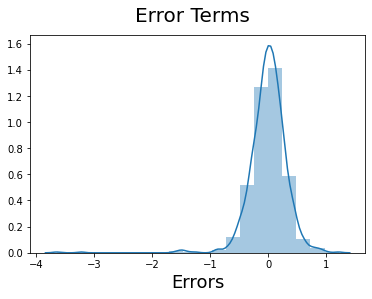

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - lasso.predict(X_train_rfe)), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
The residual of errors seems to be fairly normally distributed  
    
</div>    

## Best Model

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
- It is evident from the R square values of both models, that both Lasso and Ridge have similar performance in terms of R square values with a slight variation of around 0.3%.
- Despite the fact that Ridge has slight better performance as shown here, I will prefer <b>Lasso Regression </b>as it will provide me with an option of Feature Selection. If I refer to my models Ridge gives me 50 features, but lasso gives me 38 features and eliminates the irrelevant features with 0 coefficient values.
 
    
</div>    

In [95]:
print("Post Model Building")
print("--------------------------------------------------------------------------------------------------------")
print("No of Lasso Coefficients = ",sum(lcoef!=0))
print("No of Ridge Coefficients = ",sum(rcoef!=0))
print("--------------------------------------------------------------------------------------------------------")
print("From Lasso Model, train R Square value is {0} & test R Square Value is {1}".format(l_score_tr,l_score_tst))
print("From Ridge Model, train R Square value is {0} & test R Square Value is {1}".format(r_score_tr,r_score_tst))
print("--------------------------------------------------------------------------------------------------------")


Post Model Building
--------------------------------------------------------------------------------------------------------
No of Lasso Coefficients =  38
No of Ridge Coefficients =  50
--------------------------------------------------------------------------------------------------------
From Lasso Model, train R Square value is 0.8904058611744827 & test R Square Value is 0.8731443876110826
From Ridge Model, train R Square value is 0.8934505474502389 & test R Square Value is 0.8696874153510462
--------------------------------------------------------------------------------------------------------


## Working shown for condition when 5 predictor variables removed from Lasso 

In [96]:
new_hp.drop(columns=["MSZoning_FV", "BsmtQual_Others", "MSSubClass_160", "MSZoning_RL" , "Neighborhood_Crawfor"], axis = 1, inplace = True)
new_hp.head()

,LotArea,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,GarageAge,YearsfromLastRemod,YearsfromLastSale,ModifiedSalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_180,MSSubClass_190,MSZoning_RH,...,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Others,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageFinish_Others,GarageFinish_RFn,GarageFinish_Unf
0,8450,7,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,17,17.0,17,12,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,9600,6,8,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,44,44.0,44,13,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,11250,7,5,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,19,19.0,18,12,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,9550,7,5,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,105,22.0,50,14,11.849398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,14260,8,5,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,20,20.0,20,12,12.429216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [97]:
# Checking Shape
new_hp.shape

(1459, 164)

In [98]:
# Checking other info of dataframe
new_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 164 entries, LotArea to GarageFinish_Unf
dtypes: float64(3), int64(33), uint8(128)
memory usage: 604.1 KB


# Model Building

### Splitting data into test and train

In [99]:
# Splitting Data with a 70-30 ratio

df_train, df_test = train_test_split(new_hp, test_size = 0.3, random_state = 100)

In [100]:
# Checking Shape

df_train.shape, df_test.shape

((1021, 164), (438, 164))

### Scaling Numerical Variables

In [101]:
# Changing num_var as per the new removed variables

num_var = new_hp.select_dtypes(exclude="object")

In [102]:
# Create a scaling object
scaler = StandardScaler()

# Scale train variables using 'fit_transform'
df_train[num_var.columns] = scaler.fit_transform(df_train[num_var.columns])

# Scale test variables using 'transform'
df_test[num_var.columns] = scaler.transform(df_test[num_var.columns])

In [103]:
# Split the train dataset into X and y
y_train = df_train.pop('ModifiedSalePrice')
X_train = df_train

# Split the test dataset into X and y
y_test = df_test.pop('ModifiedSalePrice')
X_test = df_test

In [104]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             
rfe = rfe.fit(X_train, y_train)

In [105]:
#Listing the variables that's automatically ranked using RFE - all the ones ranked as 1 are considered top 50 variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrType', True, 1),
 ('MasVnrArea', False, 103),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 107),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 70),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 12),
 ('GarageCars', True, 1),
 ('GarageArea', False, 13),
 ('WoodDeckSF', False, 24),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 27),
 ('3SsnPorch', False, 60),
 ('ScreenPorch', False, 28),
 ('PoolArea', True, 1),
 ('MiscVal', False, 114),
 ('MoSold', False, 111),
 ('HouseAge', True, 1),
 ('GarageAge', False, 64),
 ('YearsfromLastRemod', False, 3),
 ('YearsfromLastSale', False, 33),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', 

In [106]:
# Creating a list of the top 50 variables selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrType', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'PoolArea', 'HouseAge',
       'MSSubClass_30', 'MSSubClass_60', 'MSSubClass_70',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Somerst', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_Others',
       'BsmtFinType1_Unf', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_Others'],
      dtype='object')

In [107]:
# Creating X_train & X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

### Lasso Model

In [108]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lassoregressor = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassoregressor.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
lasso_cv_results = pd.DataFrame(lassoregressor.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017792,0.000609,0.001870,0.000246,0.0001,{'alpha': 0.0001},-0.230176,-0.249415,-0.259321,-0.216667,-0.219075,-0.234931,0.016806,2,-0.227439,-0.218543,-0.209121,-0.206527,-0.227139,-0.217754,0.008753
1,0.008890,0.001092,0.001721,0.000025,0.001,{'alpha': 0.001},-0.229198,-0.247680,-0.257418,-0.216764,-0.220475,-0.234307,0.015736,1,-0.227453,-0.218168,-0.208910,-0.206790,-0.226652,-0.217595,0.008622
2,0.003561,0.000142,0.001691,0.000022,0.01,{'alpha': 0.01},-0.232228,-0.252383,-0.257002,-0.225627,-0.233451,-0.240138,0.012265,3,-0.233632,-0.226755,-0.216490,-0.215317,-0.232001,-0.224839,0.007650
3,0.004867,0.001742,0.002242,0.000389,0.05,{'alpha': 0.05},-0.263182,-0.277390,-0.287130,-0.256641,-0.264706,-0.269810,0.010962,4,-0.264803,-0.262334,-0.253112,-0.244005,-0.267586,-0.258368,0.008672
4,0.003043,0.000319,0.001834,0.000152,0.1,{'alpha': 0.1},-0.310205,-0.320297,-0.328175,-0.301727,-0.306387,-0.313358,0.009607,5,-0.318291,-0.313492,-0.304296,-0.289442,-0.315791,-0.308262,0.010531


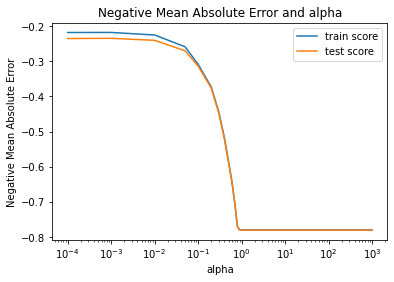

In [110]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
The plot represents various values of negative mean square error for test and train data with varying values of Alpha     
    
</div>    

In [111]:
# BuildingLasso Model
lasso = Lasso(alpha=0.001)

lasso.fit(X_train_rfe, y_train)

y_train_pred = lasso.predict(X_train_rfe)
print("Train R-Square Value for alpha = .001: ")
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_rfe)
print()
print("Test R-Square Value for alpha=.001: ")
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# The top 10 features
print()
print("Top 10 Coefficients for Optimal Value")
lcoef = pd.Series(lasso.coef_, index = X_train_rfe.columns)
lcoef.reindex(lcoef.abs().sort_values(ascending=False)[:10].index)

Train R-Square Value for alpha = .001: 
0.8944444213776238

Test R-Square Value for alpha=.001: 
0.8412187088842286

Top 10 Coefficients for Optimal Value


GrLivArea             0.244964
OverallQual           0.172392
OverallCond           0.143155
KitchenQual_TA       -0.133153
HouseAge             -0.123179
HouseStyle_2Story    -0.117164
GarageCars            0.113516
KitchenQual_Gd       -0.098340
FullBath              0.078406
FireplaceQu_Others   -0.069750
dtype: float64

In [112]:
# Model Coefficients
lasso.coef_

array([ 0.05569592,  0.17239218,  0.14315531,  0.        , -0.        ,
        0.        ,  0.01987712,  0.03632135,  0.        ,  0.03255605,
       -0.00260795,  0.24496356,  0.0695937 ,  0.07840593,  0.04902906,
       -0.05255524,  0.05252159,  0.11351576, -0.06586371, -0.12317864,
       -0.05251222,  0.06044292,  0.05847271, -0.05811437, -0.05919755,
       -0.04869222,  0.04885868,  0.05449152, -0.0573556 ,  0.05038474,
        0.05509418, -0.11716353, -0.04615583, -0.03395383, -0.        ,
        0.        , -0.        ,  0.        ,  0.05708605,  0.03087939,
        0.06639943, -0.0646749 , -0.06548985,  0.05739681, -0.0645943 ,
       -0.06864969, -0.05529821, -0.09833959, -0.13315262, -0.06974994])

In [113]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.0),
 ('LotArea', 0.056),
 ('OverallQual', 0.172),
 ('OverallCond', 0.143),
 ('MasVnrType', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.02),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.033),
 ('LowQualFinSF', -0.003),
 ('GrLivArea', 0.245),
 ('BsmtFullBath', 0.07),
 ('FullBath', 0.078),
 ('HalfBath', 0.049),
 ('KitchenAbvGr', -0.053),
 ('TotRmsAbvGrd', 0.053),
 ('GarageCars', 0.114),
 ('PoolArea', -0.066),
 ('HouseAge', -0.123),
 ('MSSubClass_30', -0.053),
 ('MSSubClass_60', 0.06),
 ('MSSubClass_70', 0.058),
 ('Neighborhood_Edwards', -0.058),
 ('Neighborhood_IDOTRR', -0.059),
 ('Neighborhood_MeadowV', -0.049),
 ('Neighborhood_NoRidge', 0.049),
 ('Neighborhood_NridgHt', 0.054),
 ('Neighborhood_OldTown', -0.057),
 ('Neighborhood_Somerst', 0.05),
 ('HouseStyle_1Story', 0.055),
 ('HouseStyle_2Story', -0.117),
 ('RoofStyle_Gable', -0.046),
 ('RoofStyle_Hip', -0.034),
 ('Exterior1st_CBlock', -0.0),
 ('Exterior1st_ImStucc', 0.0),
 ('Ext

## Top Features

In [114]:
# The top 10 features
lcoef = pd.Series(lasso.coef_,index = X_train_rfe.columns)
#list(lcoef.abs().sort_values(ascending=False)[:10].index)
lcoef.reindex(lcoef.abs().sort_values(ascending=False)[:10].index)

GrLivArea             0.244964
OverallQual           0.172392
OverallCond           0.143155
KitchenQual_TA       -0.133153
HouseAge             -0.123179
HouseStyle_2Story    -0.117164
GarageCars            0.113516
KitchenQual_Gd       -0.098340
FullBath              0.078406
FireplaceQu_Others   -0.069750
dtype: float64

In [115]:
# Score calculation at optimal value
y_train_pred = lassoregressor.predict(X_train_rfe)

ln_score_tr=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("Train R2 Square Value: ",ln_score_tr)

Train R2 Square Value:  0.8944444213776238


In [116]:
# Score Calculation for Test Optimum alpha value
y_test_pred = lassoregressor.predict(X_test_rfe)

ln_score_tst = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("Test R2 Square Value: ",ln_score_tst)

Test R2 Square Value:  0.8412187088842286


In [117]:
print("************************************************************************")
print("% Change in R2 value for training data ",round(((ln_score_tr-l_score_tr)*100/l_score_tr),2))
print("% Change in R2 value for test data ",round(((ln_score_tst-l_score_tst)*100/l_score_tst),2))
print("************************************************************************")

************************************************************************
% Change in R2 value for training data  0.45
% Change in R2 value for test data  -3.66
************************************************************************


<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
The variation in train data R2 value is an increase of 0.45% and that of test data is a decrease of 3.66%. This clearly shows that although R2 improves for test data it changes a lot showing a classic case of overfitting.

</div>  

### Best Alpha

In [118]:
print(lassoregressor.best_params_)
print(lassoregressor.best_score_)

{'alpha': 0.001}
-0.2343070813613763


<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>
    
    
This is same value as optimal alpha selected from final model 
</div>  

### Residual

Text(0.5, 0, 'Errors')

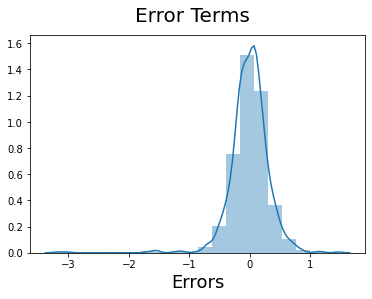

In [119]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - lasso.predict(X_train_rfe)), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<div class="alert alert-block alert-warning">
    
<b> INSIGHT: </b>

The error terms remain normally distributed even though important features are removed.
</div> 